# 不同损失函数 对比

## 引入第三方包

In [1]:
import glob
import pickle

import numpy as np
import matplotlib.pyplot as plt

## 定义过程可视化方法

In [2]:
def plot_training(history=None, metric='acc', title='Model Accuracy', loc='lower right'):
    model_list = []
    fig = plt.figure(figsize=(10, 8))
    for key, val in history.items():
        model_list.append(key.replace(HISTORY_DIR, '').rstrip('.history'))
        plt.plot(val[metric])

    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(model_list, loc=loc)
    plt.show()

## 加载预训练模型记录

In [3]:
HISTORY_DIR = './pre-trained/history/loss/'
history = {}
for filename in glob.glob(HISTORY_DIR + '*.history'):
    with open(filename, 'rb') as f:
        history[filename] = pickle.load(f)

In [4]:
for key, val in history.items():
    print(key.replace(HISTORY_DIR, '').rstrip('.history'), val.keys())

./pre-trained/history/loss\captcha_rmsprop_binary_crossentropy_bs_100_epochs_100 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
./pre-trained/history/loss\captcha_rmsprop_categorical_crossentropy_bs_100_epochs_100 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
./pre-trained/history/loss\captcha_rmsprop_mse_bs_100_epochs_100 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
./pre-trained/history/loss\captcha_rmsprop_poisson_bs_100_epochs_100 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


## 准确率变化（训练集）

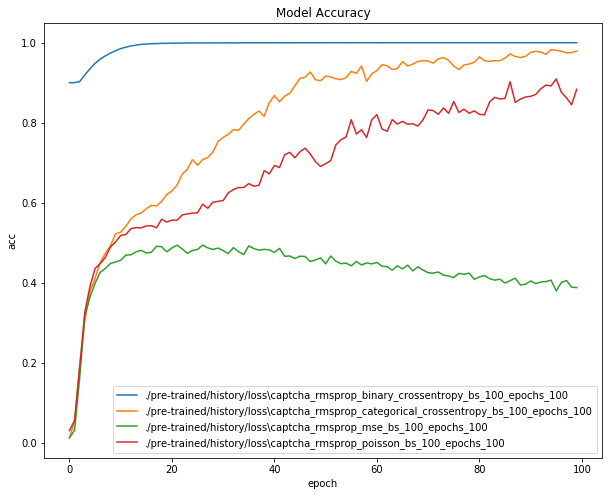

In [5]:
# del history[HISTORY_DIR+'captcha_rmsprop_categorical_crossentropy_bs_100_epochs_100'+'.history']
plot_training(history)

## 损失值变化（训练集）

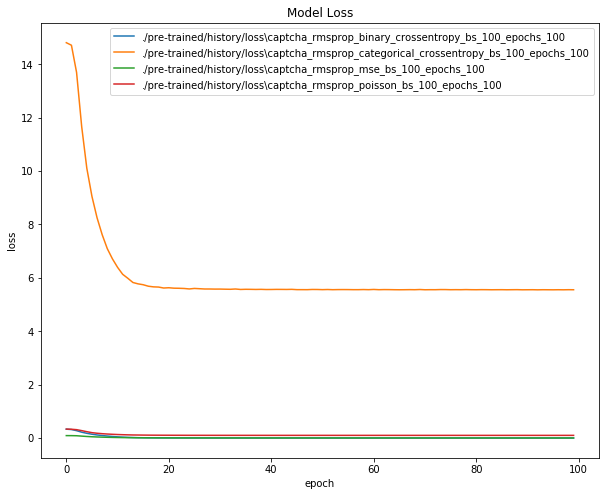

In [6]:
plot_training(history, metric='loss', title='Model Loss', loc='upper right')

## 准确率变化（测试集）

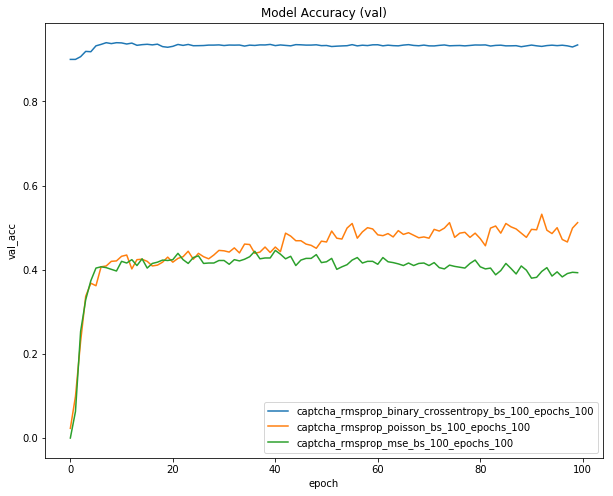

In [7]:
plot_training(history, metric='val_acc', title='Model Accuracy (val)')

## 损失值变化（测试集）

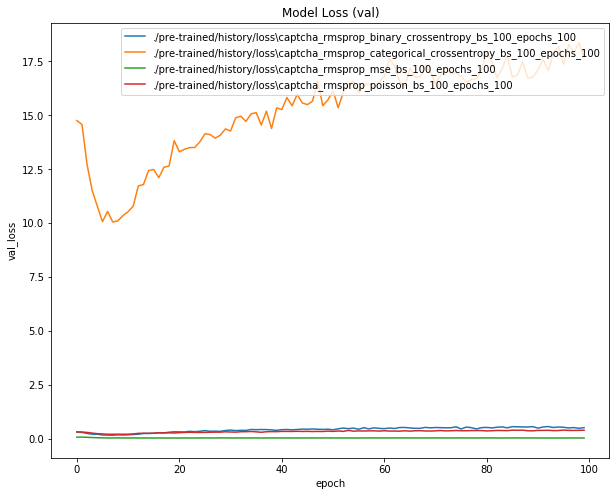

In [7]:
plot_training(history, metric='val_loss', title='Model Loss (val)', loc='upper right')